In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel("Kitap 1 (1).xlsx", header=0)
df

,DATE,DETECTOR,m_t(GeV),error(GeV)
0,4.30.2012,Tevatron,173.20,0.90
1,1.30.2011,CMS,175.50,9.20
2,1.30.2012,CMS,173.49,1.41
3,2.15.2012,CMS,172.50,1.90
4,1.30.2013,CMS,173.90,1.90
5,2.15.2013,CMS,173.54,1.29
6,1.30.2014,CMS,177.00,3.04
7,1.30.2015,CMS,172.35,0.64
8,2.15.2015,CMS,172.32,0.79
9,3.30.2015,CMS,172.82,1.41


In [16]:
df["DATE"] = pd.to_datetime(df['DATE'],  format=("%m.%d.%Y"), errors="coerce")

In [17]:
df = df.sort_values("DATE")
df

,DATE,DETECTOR,m_t(GeV),error(GeV)
1,2011-01-30,CMS,175.50,9.20
2,2012-01-30,CMS,173.49,1.41
3,2012-02-15,CMS,172.50,1.90
0,2012-04-30,Tevatron,173.20,0.90
4,2013-01-30,CMS,173.90,1.90
5,2013-02-15,CMS,173.54,1.29
6,2014-01-30,CMS,177.00,3.04
7,2015-01-30,CMS,172.35,0.64
8,2015-02-15,CMS,172.32,0.79
9,2015-03-30,CMS,172.82,1.41


In [18]:
def addcolor(b):
    a=b
    a.insert(3, "color",range(31))
    for x in range(len(a['DETECTOR'])):
        if a['DETECTOR'][x]=="CMS": a['color'][x]='blue'
        elif a['DETECTOR'][x]=="Tevatron": a['color'][x]='orange'
        elif a['DETECTOR'][x]=="COMBINED": a['color'][x]='green'
    return a

In [19]:
df = addcolor(df)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_17820\1481366425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif a['DETECTOR'][x]=="Tevatron": a['color'][x]='orange'


In [20]:
x = df["DATE"]
y = df["m_t(GeV)"]
error = df["error(GeV)"]

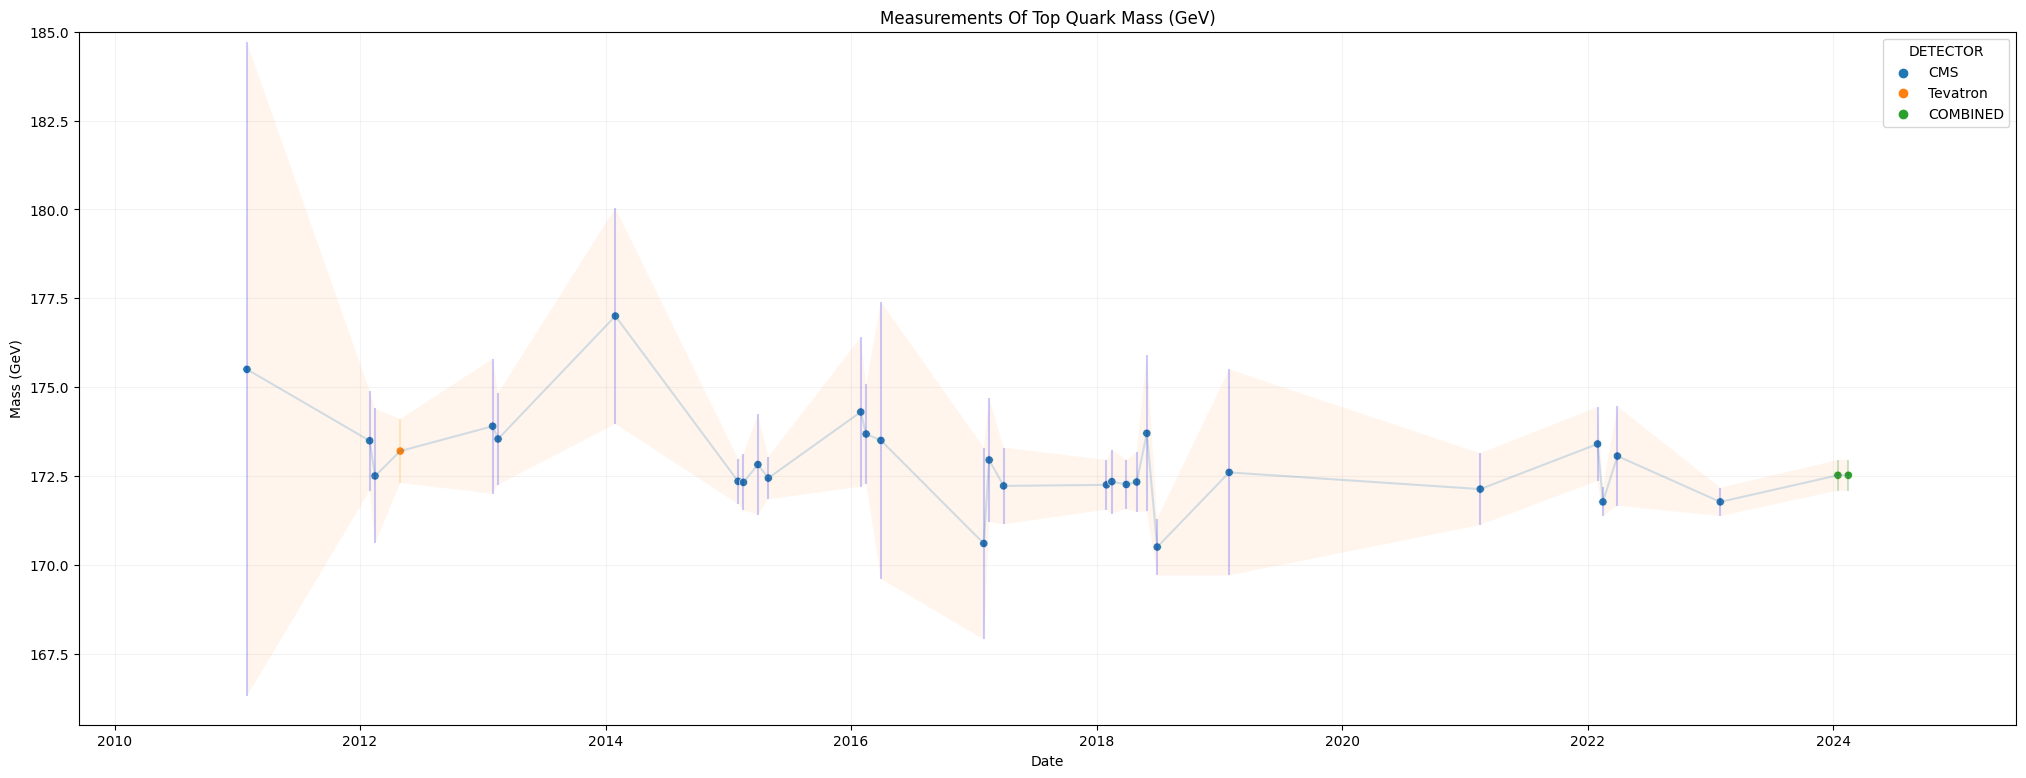

In [27]:
import seaborn as sns
plt = sns.scatterplot(data=df, x=x,y=y,hue=df["DETECTOR"])
plt.figure.set_size_inches(25, 9)
plt.errorbar(x, y, yerr=df["error(GeV)"], alpha = .2, ecolor=df["color"])
plt.fill_between(x,y-error, y+error, alpha=.07)
plt.set_xlim(df["DATE"].min()-pd.Timedelta(days=500),df["DATE"].max()+pd.Timedelta(days=500))
plt.set_ylim(165.5, 185)
plt.set_title("Measurements Of Top Quark Mass (GeV)")
plt.set_xlabel("Date")
plt.set_ylabel("Mass (GeV)")
plt.grid(True, alpha = 0.15)
